In [1]:
pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import ben_oop as o
import pandas.io.data as web

In [3]:
cd /home/milcent/Documentos/Benford\ Datasets

/home/milcent/Documentos/Benford Datasets


In [4]:
ls

layout_01_01_200812.CSV  razao_contas_a_pagar_30092006_31122010.xls
layout_01_11_200812.CSV


,Expected
First_1_Dig,
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


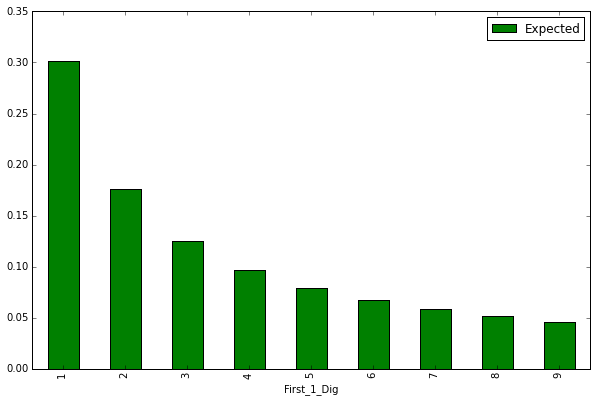

In [5]:
o.First(1)

In [6]:
i = web.DataReader('SPY', 'yahoo', start='1990-01-01')

In [7]:
i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5697 entries, 1993-01-29 to 2015-09-11
Data columns (total 6 columns):
Open         5697 non-null float64
High         5697 non-null float64
Low          5697 non-null float64
Close        5697 non-null float64
Volume       5697 non-null int64
Adj Close    5697 non-null float64
dtypes: float64(5), int64(1)
memory usage: 311.6 KB


#### Pular para retornos caso não necessite carregar do .csv

In [8]:
i = pd.read_csv('SPY.csv')

IOError: File SPY.csv does not exist

###  Reetornos percentual, logarítmico e normalizado

In [8]:
i['p_c'] = i.Close/i.Close.shift()-1
i['l_c'] = np.log(i.Close/i.Close.shift())
i['norm'] = (i.p_c - i.p_c.mean())/i.p_c.std()
i.tail()

,Open,High,Low,Close,Volume,Adj Close,p_c,l_c,norm
Date,,,,,,,,,
2015-09-04,192.850006,193.860001,191.610001,192.589996,206977400,192.589996,-0.015640,-0.015764,-1.337212
2015-09-08,195.940002,197.610001,195.169998,197.460007,111368600,197.460007,0.025287,0.024973,2.088704
2015-09-09,199.320007,199.470001,194.350006,194.759995,140901400,194.759995,-0.013674,-0.013768,-1.172605
2015-09-10,194.559998,197.220001,194.250000,195.850006,149578600,195.850006,0.005597,0.005581,0.440477
2015-09-11,195.380005,196.820007,194.529999,196.809998,109853000,196.809998,0.004902,0.004890,0.382299


In [9]:
i.head()

,Open,High,Low,Close,Volume,Adj Close,p_c,l_c,norm
Date,,,,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.921892,NaN,NaN,NaN
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,29.127596,0.007112,0.007087,0.567352
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,29.189274,0.002118,0.002115,0.149243
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,29.497862,0.010572,0.010516,0.856946
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,29.621284,0.004184,0.004175,0.322233


In [10]:
ibn = o.Analysis(abs(i.l_c), dec=8)

Initialized sequence with 5696 registries.


In [11]:
ibn.tail()

,Seq,ZN,F1D,SD,F2D,F3D,L2D
Date,,,,,,,
2015-09-04,0.015764,1576376,1,5,15,157,76
2015-09-08,0.024973,2497251,2,4,24,249,51
2015-09-09,0.013768,1376806,1,3,13,137,06
2015-09-10,0.005581,558108,5,5,55,558,08
2015-09-11,0.004890,488969,4,8,48,488,69



---Test performed on 5696 registries.---


The positive deviations` top 7 Z scores are:

             Expected     Found    Z_test
First_2_Dig                              
67           0.006434  0.010358  3.704038
13           0.032185  0.039853  3.278970
66           0.006531  0.010007  3.257028
10           0.041393  0.049860  3.207934
75           0.005752  0.007900  2.143584
69           0.006249  0.008251  1.917810
72           0.005990  0.007900  1.868003

The Mean Absolute Deviation is 0.00150995134355
For the First Two Digits:
			- 0.0000 to 0.0012: Close Conformity
			- 0.0012 to 0.0018: Acceptable Conformity
			- 0.0018 to 0.0022: Marginally Acceptable Conformity
			- Above 0.0022: Nonconformity


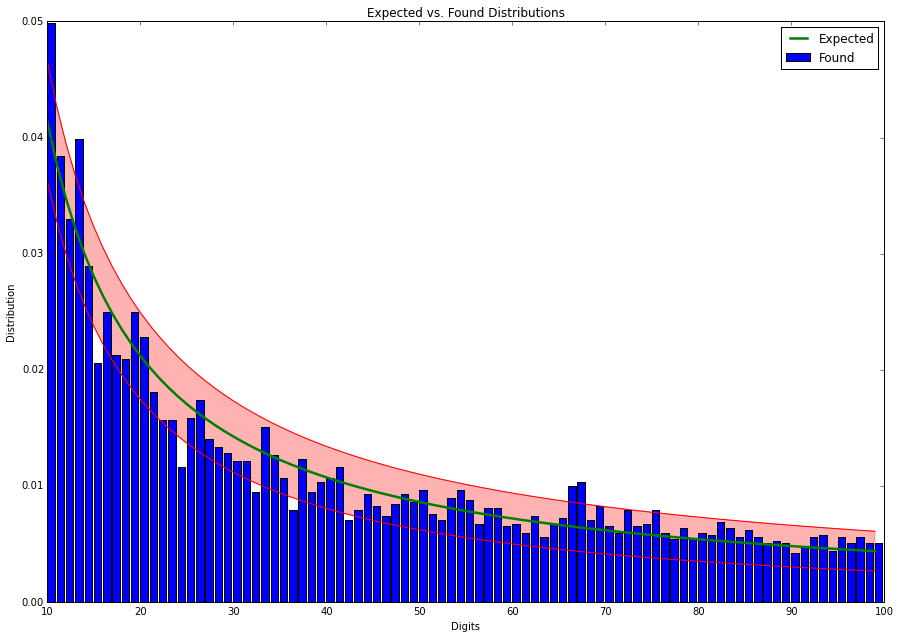

In [21]:
c = ibn.firstDigits(2,top_Z=7)

In [15]:
ibn.maps

{'F1D': array([6, 8, 7, 9, 5, 1]),
 'F2D': array([67, 13, 66, 10, 75, 69, 72]),
 'F3D': array([962, 997, 823, 695, 952, 945, 587])}

## Pular para o início com o arquivo .csv

In [5]:
r = pd.read_excel('razao_contas_a_pagar_30092006_31122010.xls',\
                  skiprows=6, parse_cols=[0,1,2,3,5,6,7,8,9],header=0)

In [6]:
r.Ano = r.Ano.apply(o._tint_)
r = r[r.Ano!=0]
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63649 entries, 3 to 63663
Data columns (total 9 columns):
Dia                 54333 non-null object
Ano                 63649 non-null int64
Remessa - Origem    54333 non-null object
ContraPartida       54333 non-null object
Lancto              54333 non-null object
Destino             42015 non-null float64
Complemento         54333 non-null object
Debito              21659 non-null object
Credito             34792 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 4.9+ MB


In [13]:
r = r.reindex(index=np.arange(1,len(r)))
r=r.dropna(how='all')
r.head()

,Dia,Ano,Remessa - Origem,ContraPartida,Lancto,Destino,Complemento,Debito,Credito
3,02/10,2006,000000-MANUAIS,8.1.7.06.00.0 279.0,00019 0004602584-01,19,INTEGRAÇAO DEWIN EST DE LANÇ 4583382 CADAST ...,171709.87,NaN
4,NaN,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,02/10,2006,002276-CP001,1.8.8.92.00.4 760.2,00019 0004569188-01,19,INTEGRACAO CONTAS A PAGAR Via Caixa,332960.21,NaN
6,02/10,2006,002276-CP001,1.8.8.92.00.4 805.6,00019 0004569189-01,19,INTEGRACAO CONTAS A PAGAR Debito Caixa Ec.Fed.,100088.95,NaN
7,02/10,2006,002276-CP001,4.1.1.85.99.1 001.7,00019 0004569190-01,19,INTEGRACAO CONTAS A PAGAR Conta Corrente DE,7880000.00,NaN


In [33]:
rr = r[r.Dia.notnull()]
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54333 entries, 3 to 63663
Data columns (total 9 columns):
Dia                 54333 non-null object
Ano                 54333 non-null float64
Remessa - Origem    54333 non-null object
ContraPartida       54333 non-null object
Lancto              54333 non-null object
Destino             42015 non-null float64
Complemento         54333 non-null object
Debito              20600 non-null float64
Credito             33732 non-null float64
dtypes: float64(4), object(5)
memory usage: 4.1+ MB


In [35]:
rr.Ano=rr.Ano.astype(int)

/home/milcent/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54333 entries, 3 to 63663
Data columns (total 9 columns):
Dia                 54333 non-null object
Ano                 54333 non-null int64
Remessa - Origem    54333 non-null object
ContraPartida       54333 non-null object
Lancto              54333 non-null object
Destino             42015 non-null float64
Complemento         54333 non-null object
Debito              20600 non-null float64
Credito             33732 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [37]:
rr.to_csv('table.csv', sep = '\t', encoding='utf-8')

## Iniciar daqui caso não precise manipular o arquivo em Excell

In [11]:
rr = pd.read_csv('table.csv', sep='\t', index_col=1,dayfirst=True,parse_dates={'Data':[1,2]})

In [12]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54333 entries, 3 to 63663
Data columns (total 8 columns):
Data                54333 non-null datetime64[ns]
Remessa - Origem    54333 non-null object
ContraPartida       54333 non-null object
Lancto              54333 non-null object
Destino             42015 non-null float64
Complemento         54333 non-null object
Debito              20600 non-null float64
Credito             33732 non-null float64
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.7+ MB


In [ ]:
rr.sort()

In [7]:
b = o.Analysis(rr.Credito)

Initialized sequence with 33732 registries.


In [8]:
b.info()

<class 'ben_oop.Analysis'>
Int64Index: 33732 entries, 13 to 63663
Data columns (total 1 columns):
Seq    33732 non-null float64
dtypes: float64(1)
memory usage: 527.1 KB


###  Arrumar mantissas

### Continuar a consertar mantissas - reler bibliografia antes

In [10]:
b.info()

<class 'ben_oop.Analysis'>
Int64Index: 33732 entries, 13 to 63663
Data columns (total 6 columns):
Seq    33732 non-null float64
ZN     33732 non-null int64
FD     33732 non-null int64
SD     33732 non-null int64
FTD    33732 non-null int64
LTD    33732 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ MB


In [11]:
b.head()

,Seq,ZN,FD,SD,FTD,LTD
13,31980.00,3198000,3,1,31,00
14,773446.87,77344687,7,7,77,87
15,13659.00,1365900,1,3,13,00
16,10726.00,1072600,1,0,10,00
17,30253.32,3025332,3,0,30,32


###  Começar a trabalhar no mapeamento da sequência original com base nos achados da análise.

In [25]:
cc = b.firstDigits(2, top_Z=3,plot=False)
cc


---Test performed on 33732 registries.---


The top 3 Z scores are:

             Expected     Found     Z_test
First_2_Dig                               
50           0.008600  0.013904  10.548942
30           0.014240  0.019892   8.760910
60           0.007179  0.010821   7.923301

The Mean Absolute Deviation is 0.00103810167029
For the First Two Digits:
			- 0.0000 to 0.0012: Close Conformity
			- 0.0012 to 0.0018: Acceptable Conformity
			- 0.0018 to 0.0022: Marginally Acceptable Conformity
			- Above 0.0022: Nonconformity


,Expected,Counts,Found,Dif,AbsDif,Z_test
First_2_Dig,,,,,,
10,0.041393,1543,0.045743,0.004350,0.004350,4.010985
11,0.037789,1293,0.038332,0.000543,0.000543,0.522998
12,0.034762,1125,0.033351,-0.001411,0.001411,1.414730
13,0.032185,1002,0.029705,-0.002480,0.002480,2.580735
14,0.029963,878,0.026029,-0.003935,0.003935,4.238627
15,0.028029,1073,0.031810,0.003781,0.003781,4.207075
16,0.026329,864,0.025614,-0.000715,0.000715,0.820490
17,0.024824,807,0.023924,-0.000900,0.000900,1.062066
18,0.023481,770,0.022827,-0.000654,0.000654,0.793360


In [26]:
b.maps

{'FD': array([8, 1, 7, 9, 6, 5]), 'FTD': array([50, 30, 60])}

In [50]:
bb =b.copy()
bb.head()

,Seq,ZN,FD,SD,FTD,LTD
13,31980.00,3198000,3,1,31,00
14,773446.87,77344687,7,7,77,87
15,13659.00,1365900,1,3,13,00
16,10726.00,1072600,1,0,10,00
17,30253.32,3025332,3,0,30,32


In [71]:
e = bb.FTD == 30
u = bb.FTD ==50
e|u

In [51]:
bb['Ord']=np.nan
for n,i in enumerate(b.maps['FTD']):
    bb.Ord.loc[bb.FTD==i]=n

In [53]:
bb.head()

,Seq,ZN,FD,SD,FTD,LTD,Ord
13,31980.00,3198000,3,1,31,00,NaN
14,773446.87,77344687,7,7,77,87,NaN
15,13659.00,1365900,1,3,13,00,NaN
16,10726.00,1072600,1,0,10,00,NaN
17,30253.32,3025332,3,0,30,32,1


In [54]:
bb = bb.dropna()
bb.head()

,Seq,ZN,FD,SD,FTD,LTD,Ord
17,30253.32,3025332,3,0,30,32,1
41,30.00,3000,3,0,30,00,1
44,30.00,3000,3,0,30,00,1
153,50224.00,5022400,5,0,50,00,0
188,500.00,50000,5,0,50,00,0


In [55]:
bb = bb[['Seq','Ord']].sort('Ord')

In [57]:
dd = bb.join(rr)
dd.head()

,Seq,Ord,Data,Remessa - Origem,ContraPartida,Lancto,Destino,Complemento,Debito,Credito
27095,500.0,0,2008-04-10,002655-CP001,8.1.7.99.00.0 654.4,00019 0008055405-02,19,INTEGRACAO CONTAS A PAGAR Desp. Buscas Apreen...,NaN,500.0
41549,50.0,0,2009-02-25,002876-CP001,8.1.7.75.00.0 604.3,00019 0009123124-02,19,INTEGRACAO CONTAS A PAGAR Ajuda De Custo - Vi...,NaN,50.0
41432,500.0,0,2009-02-19,002874-CP001,8.1.7.75.00.0 604.3,00019 0009113788-02,19,INTEGRACAO CONTAS A PAGAR Ajuda De Custo - Vi...,NaN,500.0
41407,505.1,0,2009-02-19,002717-ERP-CSC,8.1.7.42.00.2 412.9,00019 0009116002-02,NaN,INTEGRAÇÃO ERP-ORACLE ORACLE EBS,NaN,505.1
15382,50228.0,0,2007-08-23,002500-CP001,8.1.7.57.00.4 492.3,00019 0005658812-02,19,INTEGRACAO CONTAS A PAGAR Servicos Graficos,NaN,50228.0


In [59]:
dd

,Seq,Ord,Data,Remessa - Origem,ContraPartida,Lancto,Destino,Complemento,Debito,Credito
27095,500.00,0,2008-04-10,002655-CP001,8.1.7.99.00.0 654.4,00019 0008055405-02,19,INTEGRACAO CONTAS A PAGAR Desp. Buscas Apreen...,NaN,500.00
41549,50.00,0,2009-02-25,002876-CP001,8.1.7.75.00.0 604.3,00019 0009123124-02,19,INTEGRACAO CONTAS A PAGAR Ajuda De Custo - Vi...,NaN,50.00
41432,500.00,0,2009-02-19,002874-CP001,8.1.7.75.00.0 604.3,00019 0009113788-02,19,INTEGRACAO CONTAS A PAGAR Ajuda De Custo - Vi...,NaN,500.00
41407,505.10,0,2009-02-19,002717-ERP-CSC,8.1.7.42.00.2 412.9,00019 0009116002-02,NaN,INTEGRAÇÃO ERP-ORACLE ORACLE EBS,NaN,505.10
15382,50228.00,0,2007-08-23,002500-CP001,8.1.7.57.00.4 492.3,00019 0005658812-02,19,INTEGRACAO CONTAS A PAGAR Servicos Graficos,NaN,50228.00
41375,50600.00,0,2009-02-18,002873-CP001,8.1.7.06.00.0 270.6,00019 0009106108-02,19,INTEGRACAO CONTAS A PAGAR Alugueis De Imoveis,NaN,50600.00
41336,5083.22,0,2009-02-17,002872-CP001,8.1.7.57.00.4 521.0,00019 0009105004-02,19,INTEGRACAO CONTAS A PAGAR Comissao - Franquias,NaN,5083.22
42273,5.09,0,2009-03-16,002891-CP001,4.9.4.20.10.8 113.3,00019 0009192247-02,19,INTEGRACAO CONTAS A PAGAR CONTR. SOCIAL S/ LU...,NaN,5.09
15511,501452.93,0,2007-08-27,002502-CP001,8.1.7.12.00.1 280.0,00019 0005678697-02,19,INTEGRACAO CONTAS A PAGAR Correios Telegr.selos,NaN,501452.93
15814,502.08,0,2007-08-31,002506-CP001,8.1.7.99.00.0 645.5,00019 0005709873-02,19,INTEGRACAO CONTAS A PAGAR Txs e Emol Judiciai...,NaN,502.08


In [29]:
for n,i in enumerate(b.maps['FTD']):
    g = bb.FTD==i
    if n==0:
        mm = g
    else:
        mm = mm|g   

In [31]:
sum(mm)

1505

In [32]:
bb = bb[mm]
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 17 to 63602
Data columns (total 6 columns):
Seq    1505 non-null float64
ZN     1505 non-null int64
FD     1505 non-null int64
SD     1505 non-null int64
FTD    1505 non-null int64
LTD    1505 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 82.3+ KB


In [33]:
bb['I']=bb.index

In [38]:
bb.sort(['FTD','I']).set_index(['FTD','I'])['Seq']

FTD  I    
30   17         30253.32
     41            30.00
     44            30.00
     215          306.12
     407          300.00
     625        30250.00
     723      3000000.00
     919       300000.00
     989        30000.00
     1147         302.61
     1148          30.00
     1187       30813.50
     1202         302.79
     1216        3067.30
     1231        3000.00
     1347         307.18
     1595       30430.00
     1630        3053.50
     1702          30.00
     1732         300.00
     1817         300.00
     1866         302.03
     1868          30.00
     1880        3012.30
     1920       30000.00
     1974         305.19
     1983         300.00
     1988         300.00
     2051       30000.00
     2066        3000.00
                 ...    
60   57612      60601.46
     57681      60362.72
     57697          6.09
     57723      60387.28
     58279       6012.71
     58386         60.25
     58586        600.00
     58647     601778.89
     59079    

In [47]:
index = pd.MultiIndex.from_arrays([bb.FTD,bb.index], names=['FTD', 'ind'])

In [51]:
arrays = [[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']]
pd.MultiIndex.from_arrays(arrays, names=('number', 'color'))

MultiIndex(levels=[[1, 2], [u'blue', u'red']],
           labels=[[0, 0, 1, 1], [1, 0, 1, 0]],
           names=[u'number', u'color'])

In [56]:
bb = bb.set_index(index)
bb.head()

,,Seq,ZN,FD,SD,FTD,LTD
FTD,ind,,,,,,
31,13,31980.00,3198000,3,1,31,00
77,14,773446.87,77344687,7,7,77,87
13,15,13659.00,1365900,1,3,13,00
10,16,10726.00,1072600,1,0,10,00
30,17,30253.32,3025332,3,0,30,32


In [60]:
bb.reindex()

ValueError: cannot set an array element with a sequence